In [48]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import (StandardScaler)
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import(LinearRegression, Lasso, Ridge, ElasticNet)
from sklearn.metrics import(r2_score, mean_squared_error,mean_absolute_error)
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import(RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)
warnings.filterwarnings("ignore")

In [56]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
num_cols = [i for i in df.columns if df[i].dtype in ('float64','int64')]
num_cols

['age', 'bmi', 'children', 'expenses']

In [8]:
cat_cols = [i for i in df.columns if df[i].dtype == 'O']
cat_cols

['sex', 'smoker', 'region']

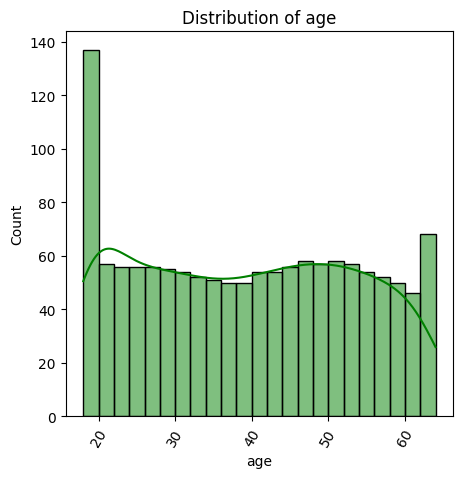

In [9]:
plt.figure(figsize = (5,5))
plt.title('Distribution of age')
sns.histplot(data = df,
             x = 'age',
             binwidth =2,
             kde = True,
             color = 'green')

plt.xticks(rotation = 60);

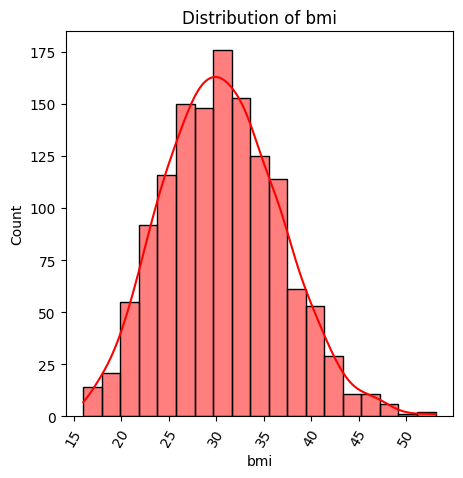

In [10]:
plt.figure(figsize = (5,5))
plt.title('Distribution of bmi')
sns.histplot(data = df,
             x = 'bmi',
             binwidth =2,
             kde = True,
             color = 'red')

plt.xticks(rotation = 60);

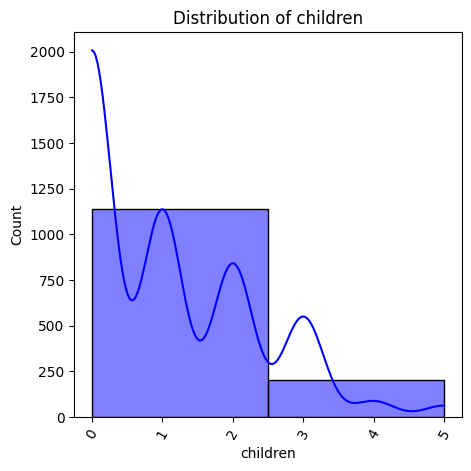

In [11]:
plt.figure(figsize = (5,5))
plt.title('Distribution of children')
sns.histplot(data = df,
             x = 'children',
             binwidth =2,
             kde = True,
             color = 'blue')

plt.xticks(rotation = 60);

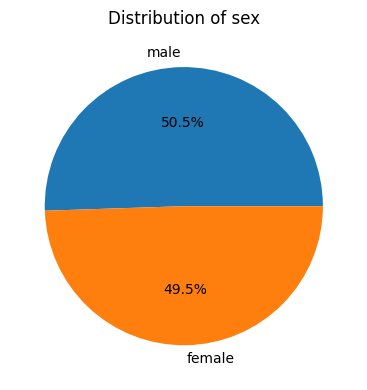

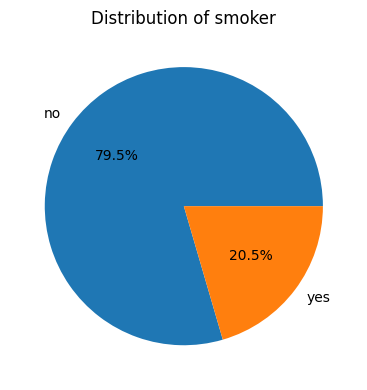

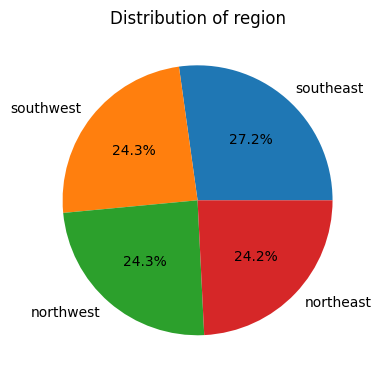

In [12]:
c = 1
for i,col in enumerate(cat_cols):
    plt.figure(figsize = (4,4))
    plt.title(label= f'Distribution of {col}',
              loc = 'center')
    plt.pie(df[col].value_counts(),
            labels=df[col].value_counts().index,  
            autopct = '%1.1f%%')
    plt.tight_layout()
    c += 1

In [13]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

<Axes: >

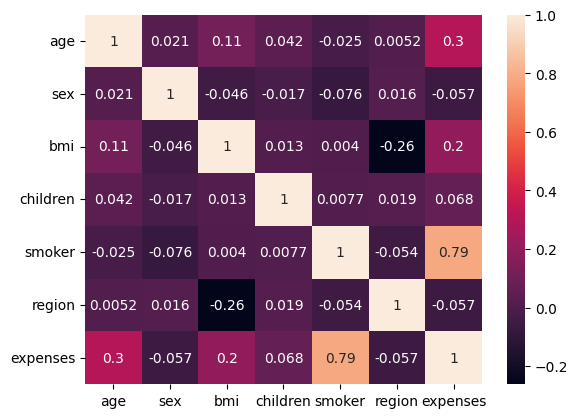

In [14]:
sns.heatmap(df.corr(),annot=True)

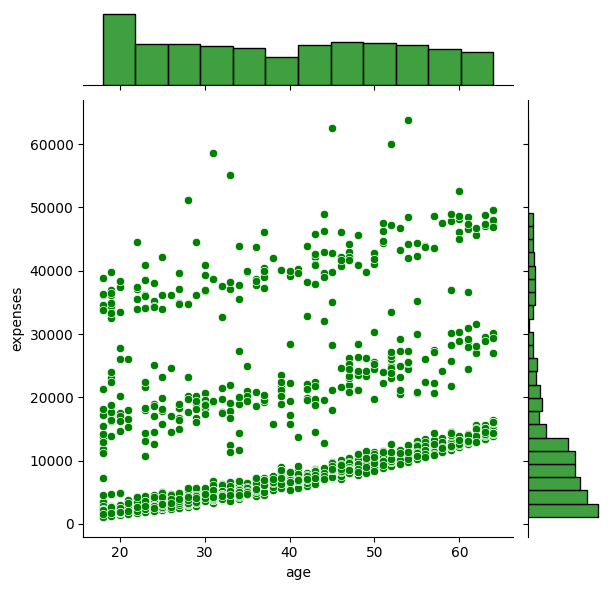

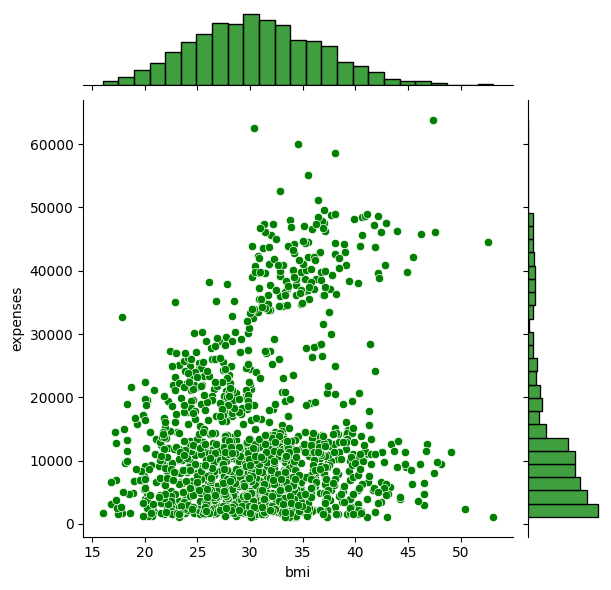

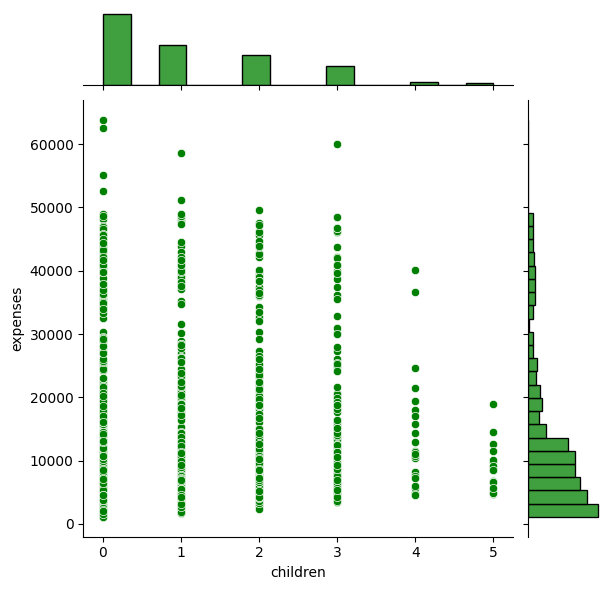

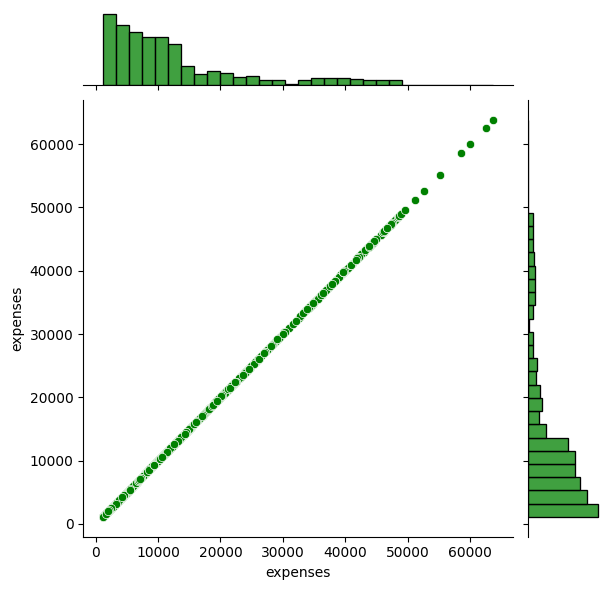

In [27]:
for i in num_cols:
    sns.jointplot(x = df[i],y = df.expenses, color= 'Green', kind = 'scatter')
    plt.show()

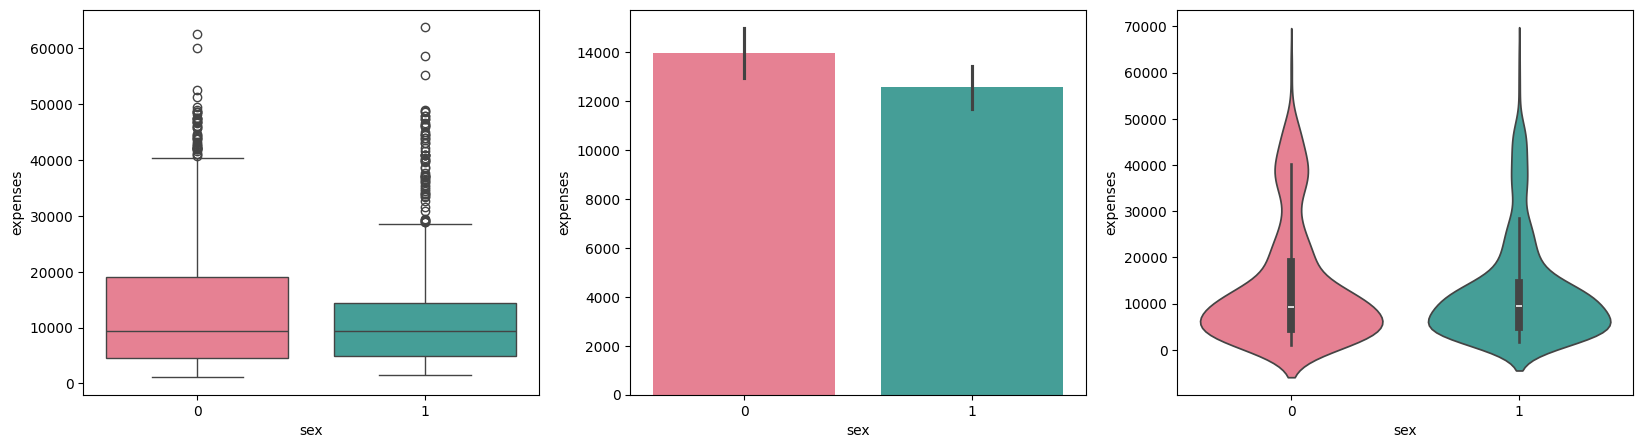

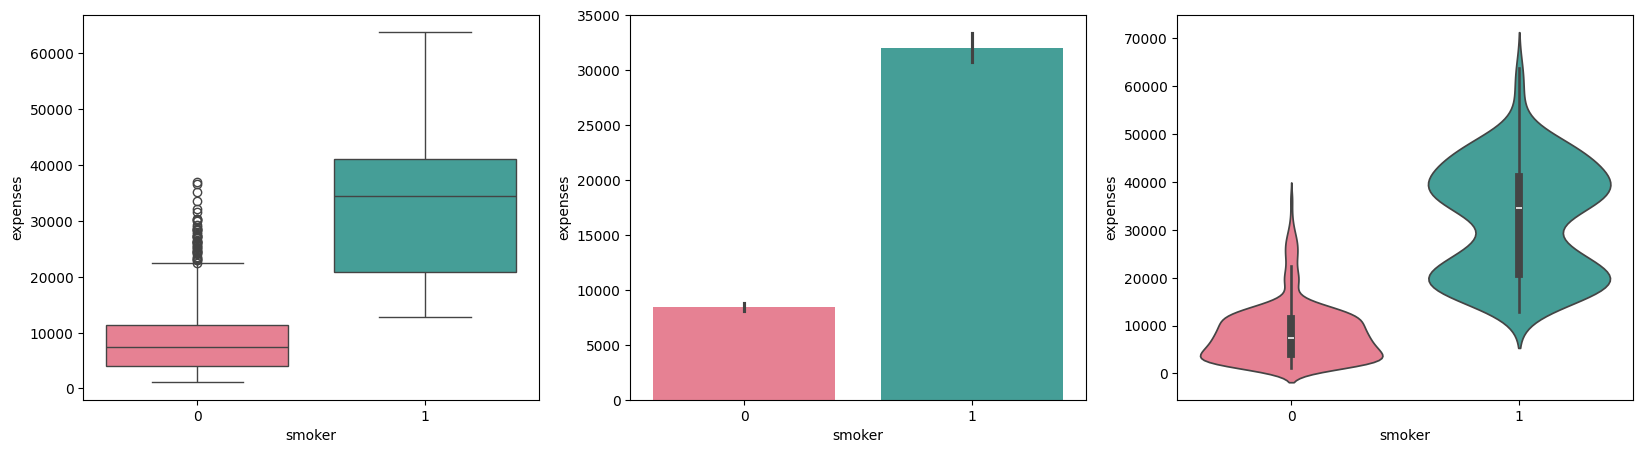

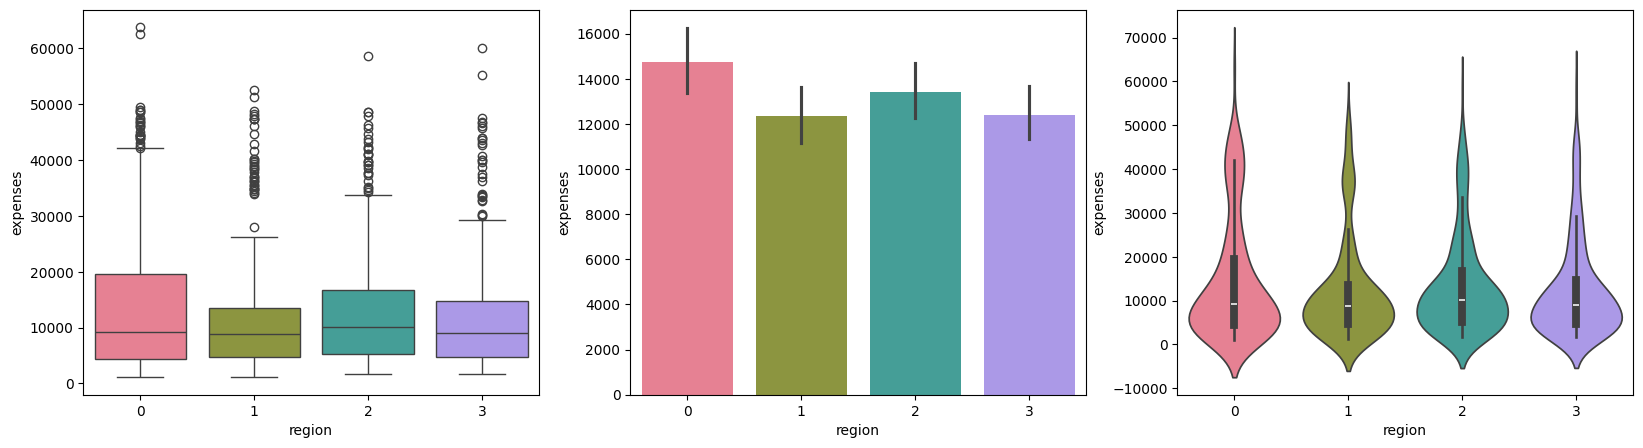

In [23]:
for i in cat_cols:
    f = plt.figure(figsize=(20,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = df[i], y= df.expenses, palette = 'husl')

    ax1 = f.add_subplot(132)
    sns.barplot(x = df[i], y= df.expenses, palette = 'husl')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = df[i], y= df.expenses, orient= 'vertical', palette = 'husl')
    
    plt.show()

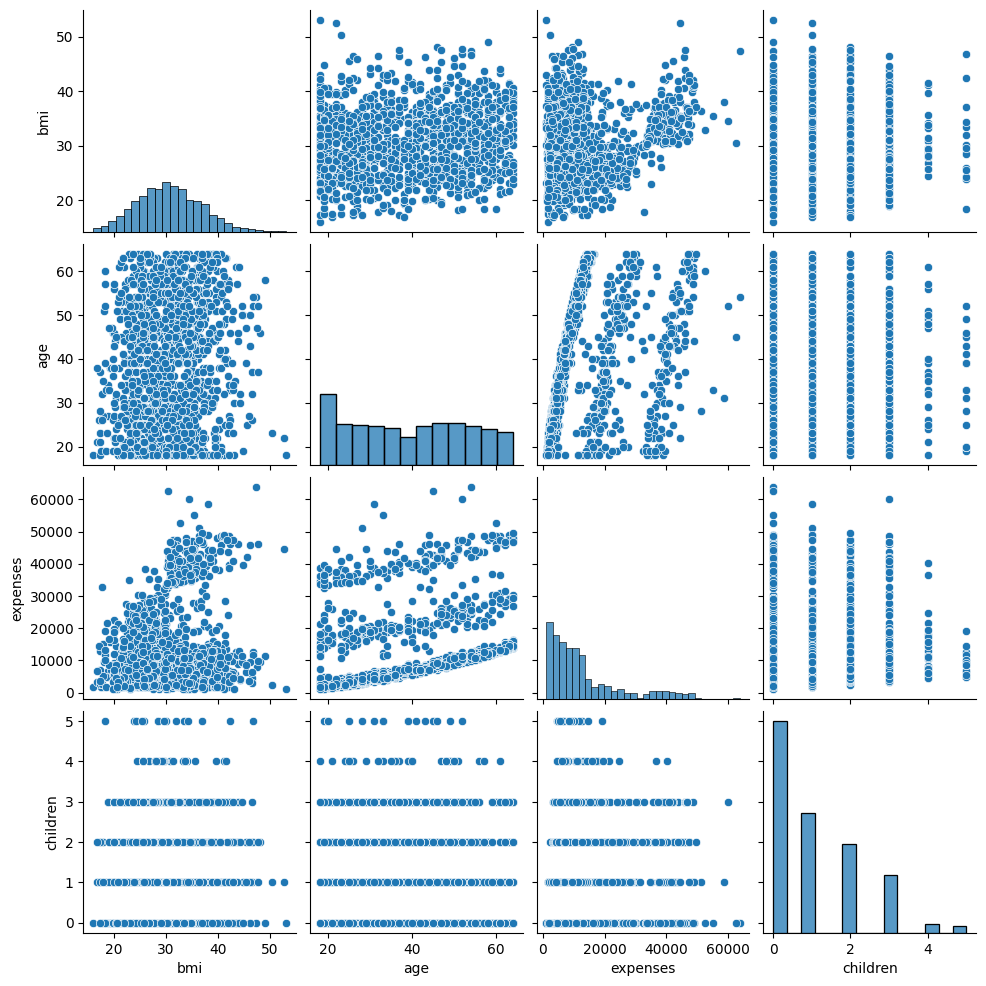

In [35]:
sns.pairplot(df[['bmi', 'age', 'expenses', 'children']])

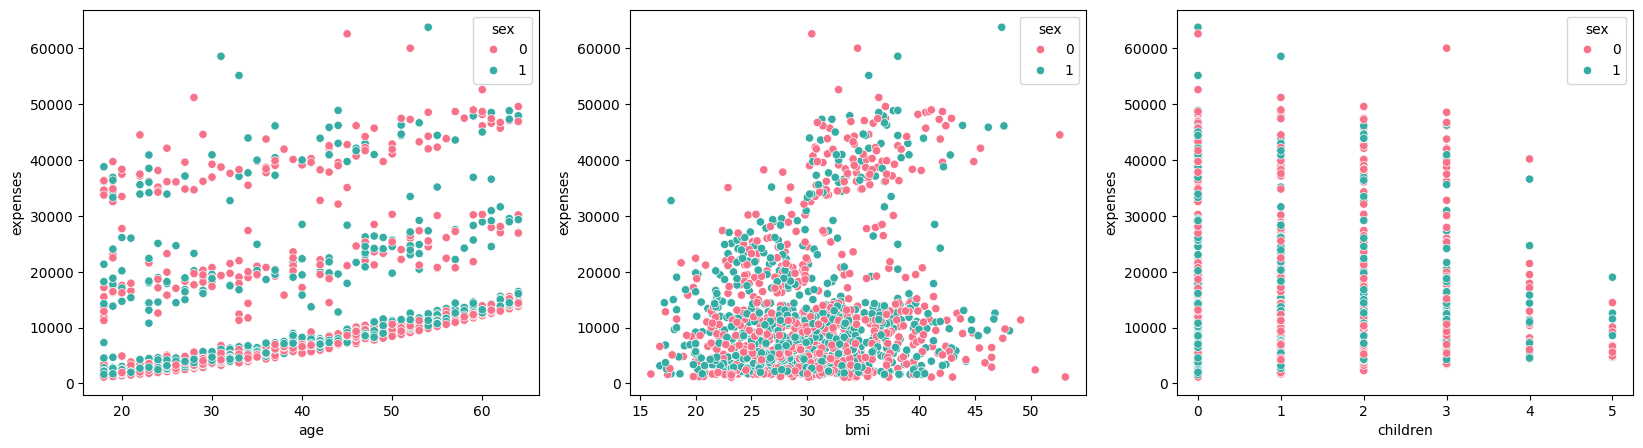

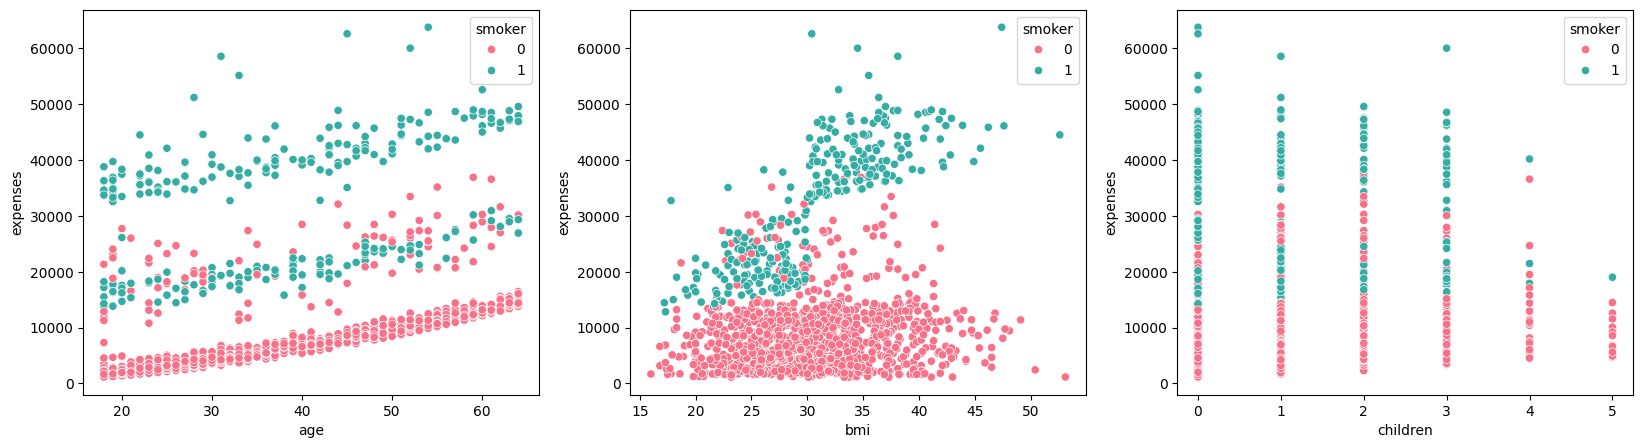

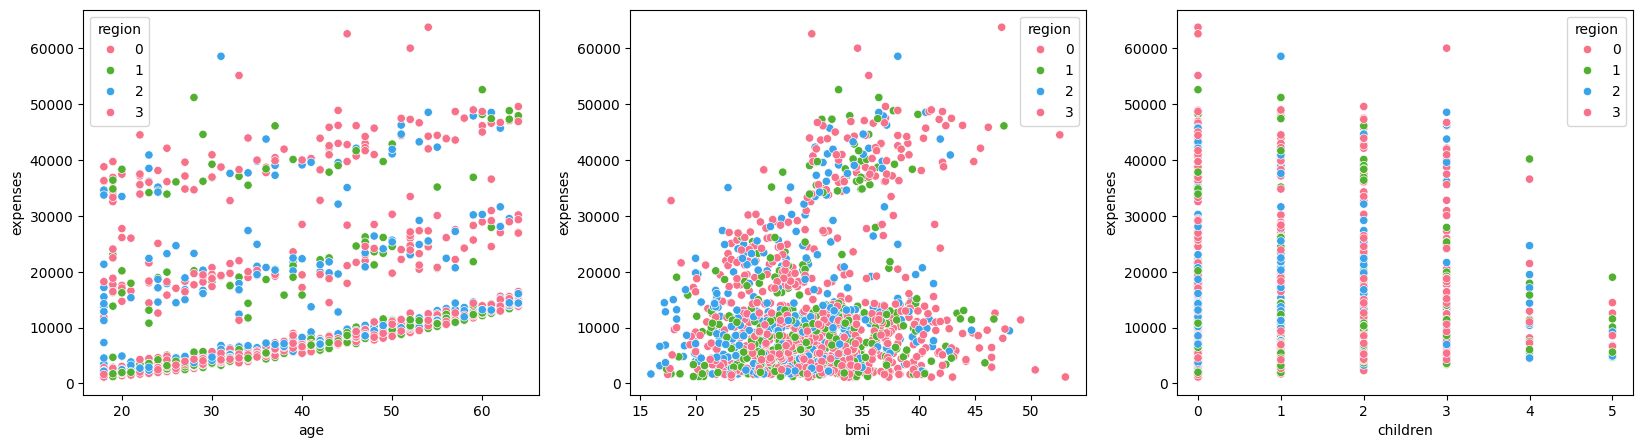

In [29]:
for i in cat_cols:
    f = plt.figure(figsize=(20,5))
    ax = f.add_subplot(131)
    sns.scatterplot(data=df,x='age',y='expenses',hue=i, palette = 'husl')

    ax1 = f.add_subplot(132)
    sns.scatterplot(data=df,x='bmi',y='expenses',hue=i, palette = 'husl')
    
    ax2 = f.add_subplot(133)
    sns.scatterplot(data=df,x='children',y='expenses',hue=i, palette = 'husl')
    
    plt.show()

In [31]:
X = df.drop(['expenses'], axis = 1)
y = df['expenses']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 39)

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 40218034.126292385


In [38]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression MSE:", mse)

Ridge Regression MSE: 40263221.66933201


In [39]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Lasso Regression MSE:", mse)

Lasso Regression MSE: 40218333.453249246


In [42]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree Regression MSE:", mse)

Decision Tree Regression MSE: 57228582.49251231


In [45]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regression MSE:", mse)

Random Forest Regression MSE: 26991160.56812682


In [49]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Support Vector Regression MSE:", mse)

Support Vector Regression MSE: 176404074.67571354


In [50]:
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
en_model.fit(X_train, y_train)
y_pred = en_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("ElasticNet Regression MSE:", mse)

ElasticNet Regression MSE: 97462846.31054525


In [51]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("KNeighborsRegressor MSE:", mse)

KNeighborsRegressor MSE: 154825201.55424386


In [52]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("GradientBoostingRegressor MSE:", mse)

GradientBoostingRegressor MSE: 24335943.3632646


In [53]:
ab_model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0)
ab_model.fit(X_train, y_train)
y_pred = ab_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("AdaBoostRegressor MSE:", mse)

AdaBoostRegressor MSE: 30395024.029705606


In [54]:
from sklearn.model_selection import cross_val_score

cross_val_mse = cross_val_score(en_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("ElasticNet Cross-Validation MSE:", -cross_val_mse.mean())

ElasticNet Cross-Validation MSE: 88376085.2186128


In [57]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': model.__class__.__name__,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
    KNeighborsRegressor(n_neighbors=5),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    AdaBoostRegressor(n_estimators=50, learning_rate=1.0),
    SVR(kernel='rbf')
]

results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append(result)
    
results_df = pd.DataFrame(results)
print(results_df)

                       Model           MSE          RMSE          MAE  \
0           LinearRegression  4.021803e+07   6341.769006  4297.832714   
1                      Ridge  4.026322e+07   6345.330698  4310.641854   
2                      Lasso  4.021833e+07   6341.792606  4297.899044   
3                 ElasticNet  9.746285e+07   9872.327300  7675.628175   
4        KNeighborsRegressor  1.548252e+08  12442.877543  8834.551963   
5      DecisionTreeRegressor  5.826978e+07   7633.464344  3952.754888   
6      RandomForestRegressor  2.602724e+07   5101.690323  2754.310354   
7  GradientBoostingRegressor  2.432788e+07   4932.329761  2636.011545   
8          AdaBoostRegressor  2.916207e+07   5400.191559  3979.804347   
9                        SVR  1.764041e+08  13281.719568  8614.130810   

         R²  
0  0.748534  
1  0.748251  
2  0.748532  
3  0.390607  
4  0.031944  
5  0.635664  
6  0.837263  
7  0.847888  
8  0.817662  
9 -0.102979  


In [64]:
def cross_validate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -scores.mean()
    return avg_mse
cross_val_results = []
for model in models:
    avg_mse = cross_validate_model(model, X_train, y_train)
    cross_val_results.append({'Model': model.__class__.__name__, 'Cross-Val MSE': avg_mse})

cv_results_df = pd.DataFrame(cross_val_results)
print(cv_results_df)

                       Model  Cross-Val MSE
0           LinearRegression   3.626677e+07
1                      Ridge   3.626923e+07
2                      Lasso   3.626670e+07
3                 ElasticNet   8.837609e+07
4        KNeighborsRegressor   1.292285e+08
5      DecisionTreeRegressor   4.402709e+07
6      RandomForestRegressor   2.278701e+07
7  GradientBoostingRegressor   2.041125e+07
8          AdaBoostRegressor   2.520283e+07
9                        SVR   1.571914e+08


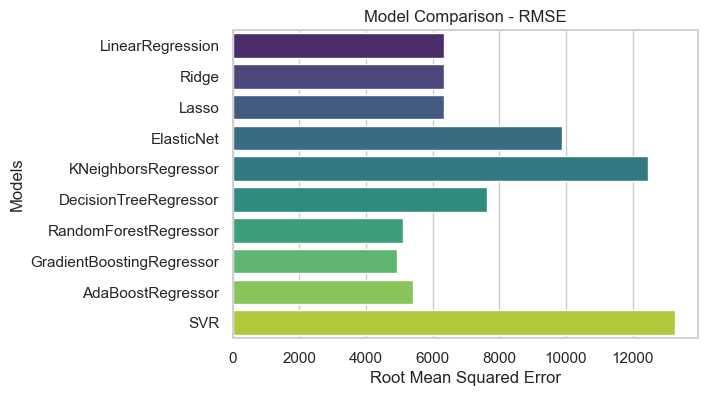

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x="RMSE", y="Model", data=results_df, palette="viridis")
plt.title('Model Comparison - RMSE')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Models')
plt.show()

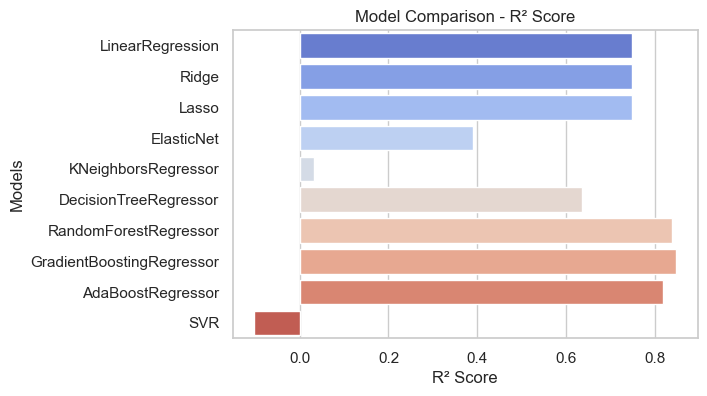

In [62]:
plt.figure(figsize=(6, 4))
sns.barplot(x="R²", y="Model", data=results_df, palette="coolwarm")
plt.title('Model Comparison - R² Score')
plt.xlabel('R² Score')
plt.ylabel('Models')
plt.show()

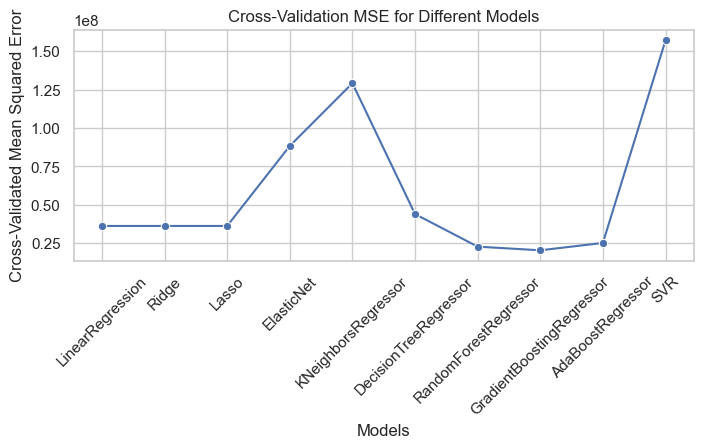

In [69]:
plt.figure(figsize=(8, 3))
sns.lineplot(x="Model", y="Cross-Val MSE", data=cv_results_df, marker="o", color="b")
plt.xticks(rotation=45)
plt.title('Cross-Validation MSE for Different Models')
plt.xlabel('Models')
plt.ylabel('Cross-Validated Mean Squared Error')
plt.show()

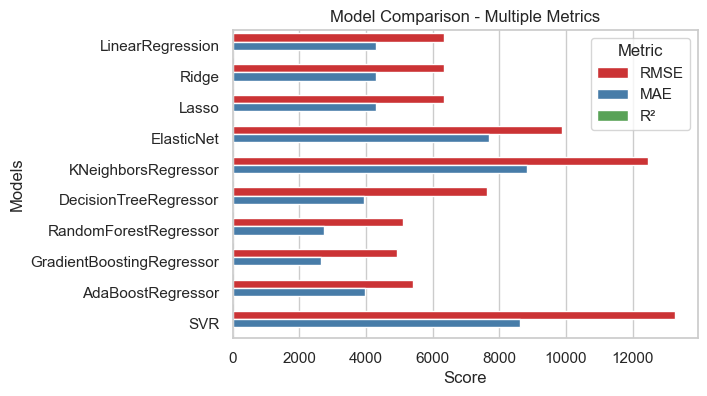

In [66]:
melted_results = pd.melt(results_df, id_vars="Model", value_vars=["RMSE", "MAE", "R²"], 
                         var_name="Metric", value_name="Score")
plt.figure(figsize=(6, 4))
sns.barplot(x="Score", y="Model", hue="Metric", data=melted_results, palette="Set1")
plt.title('Model Comparison - Multiple Metrics')
plt.xlabel('Score')
plt.ylabel('Models')
plt.show()

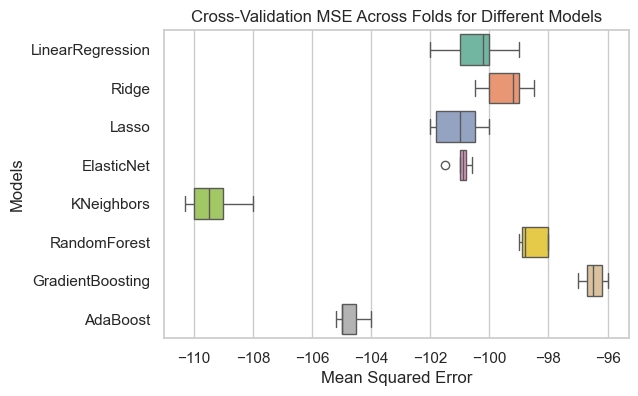

In [68]:
cross_val_scores = {
    'Model': ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'KNeighbors', 'RandomForest', 'GradientBoosting', 'AdaBoost'],
    'Fold1': [-100, -99, -101, -100.8, -110, -98, -96, -105],
    'Fold2': [-102, -100, -100.5, -101, -109, -99, -96.5, -104],
    'Fold3': [-99, -98.5, -102, -101.5, -108, -98, -97, -105],
    'Fold4': [-100.2, -99.2, -101.8, -100.9, -109.5, -98.8, -96.2, -104.5],
    'Fold5': [-101, -100.5, -100, -100.6, -110.3, -98.9, -96.7, -105.2]
}

cv_df = pd.DataFrame(cross_val_scores)
cv_melted = pd.melt(cv_df, id_vars='Model', value_vars=['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5'], 
                    var_name='Fold', value_name='MSE')
plt.figure(figsize=(6, 4))
sns.boxplot(x='MSE', y='Model', data=cv_melted, palette="Set2")
plt.title('Cross-Validation MSE Across Folds for Different Models')
plt.xlabel('Mean Squared Error')
plt.ylabel('Models')
plt.show()